In [53]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt
import chainer
import chainer.functions as F
import chainer.links as L
import chainer.initializers as I
from mpl_toolkits.mplot3d import Axes3D

In [26]:
def load_scandata(dtype=np.float32):
    arr = []
    y = []
    # First, load the data
    with open('SCANDATA.txt') as f:
        text = f.readlines()
    x = [float(t) for t in text[0].split("\t")[1:]]
    # split delimited columns into strings 
    for line in text[1:]:
        values = line.split("\t")
        y.append(float(values[0]))
        arr.append([float(t) for t in values[1:]])
    def c(x): return np.array(x,dtype=dtype)
    return c(arr), c(x), c(y)

In [38]:
arr, x, y = load_scandata()

In [39]:
y = y[200:]
arr = arr[200:,:]

In [40]:
X, Y = np.meshgrid(x, y)
X, Y = X.astype(np.float32), Y.astype(np.float32)

In [41]:
print(arr.shape, x.shape, y.shape, X.shape, Y.shape)

(201, 316) (316,) (201,) (201, 316) (201, 316)


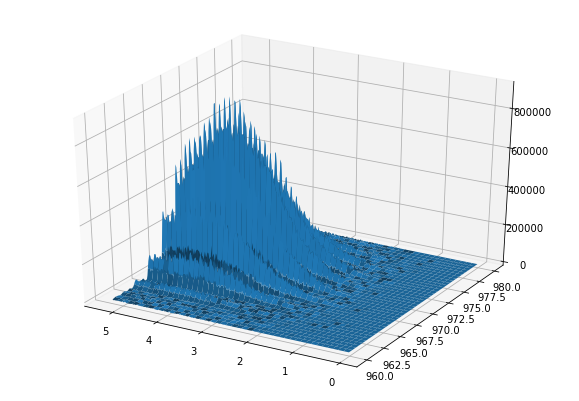

In [65]:
fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X,Y,arr)
ax.invert_xaxis()

In [61]:
interp = sp.interpolate.interp2d(x, y, arr)
x2, y2 = x[::5], y[::5]
arr2 = interp(x2, y2)

In [62]:
X2, Y2 = np.meshgrid(x2, y2)

In [64]:
print(arr2.shape, x2.shape, y2.shape, X2.shape, Y2.shape)

(41, 64) (64,) (41,) (41, 64) (41, 64)


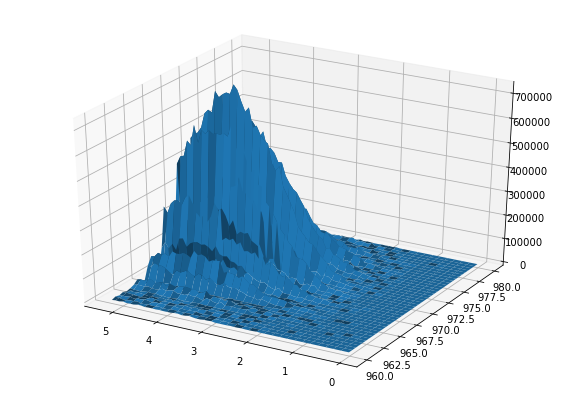

In [66]:
fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X2,Y2,arr2)
ax.invert_xaxis()